#CNN_TEST3 C드라이브 (파일, 이미지 저장)
## 이미지 전처리 확인, 모델 재학습, 이미지 품질 개선.. => 이미지이 전처리와 모델의 학습 상태
## 입력 이미지 크기가 화면에 꽉차야 됨 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf #deeplearning library #tensorflow는 신경망을 구축하고 학습시키는 데 사

In [3]:
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.mnist.load_data() 
#mnist 손글씨 숫자 데이터 셋으로
#특징: 28 x 28 픽셀의 흑백 이미지로 구성된 숫자, 학습용 데이터셋: 60,000개의 이미지와 레이블, 테스트용 데이터 셋: 10,000개의 이미지와 레이블 
#date_train: 학습용 데이터 이미지 배열 , label_train: 학습용 데이터 레이블 배열 (각 이미지의 실제 숫자값)

In [4]:
data_train.shape, data_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
data=np.concatenate((data_train,data_test),axis=0)
label=np.concatenate((label_train,label_test),axis=0)
data.shape, label.shape
#np.concatenate()는 두개 이상의 배열 연결 함수 , 기본적으로 배열을 지정한 축으로 기준으로 합침
#data_train , date_test 학습용과 테스트용 데이터로 두 배열을 합쳐서 하나의 큰 배열을 만들고자 하는 목적
#axis = 0: 배열을 0번축(행방향)을 기준으로 합침 => data_train data_test 의 행을 합쳐서 새로운 배열 만듦



((70000, 28, 28), (70000,))

In [6]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(data,label,test_size=0.2)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D #kernel
from keras.layers import Flatten 
from keras.layers import MaxPooling2D #pooling

In [8]:
Cnn=Sequential()
Cnn.add(Conv2D(3, input_shape=(28,28,1), kernel_size=(3,3),padding="same", activation="relu"))
Cnn.add(MaxPooling2D(2))
Cnn.add(Flatten())
Cnn.add(Dense(200,activation="relu"))
Cnn.add(Dropout(0.2))
Cnn.add(Dense(100,activation="relu"))
Cnn.add(Dense(10,activation="softmax")) #0~9
Cnn.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
#오류는 Keras에서 metrics 인자가 리스트, 튜플, 또는 딕셔너리 형태여야 하는데, 문자열 ("accuracy")전달해서 발생
#해결하려면 metrics 인자를 리스트로 변경
#keras가 Sequential 모델에서 input_shape를 직접 Conv2D 레이어에 전달하는 대신, 
#Input(shape=...)을 사용하는 것을 권장하고 있음을 경고하는 내용

C:\Users\used3\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

Cnn = Sequential()
Cnn.add(Input(shape=(28, 28, 1)))  # 입력 모양을 Input 레이어로 정의
Cnn.add(Conv2D(3, kernel_size=(3, 3), padding="same", activation="relu"))
Cnn.add(MaxPooling2D(2))
Cnn.add(Flatten())
Cnn.add(Dense(200, activation="relu"))
Cnn.add(Dropout(0.2))
Cnn.add(Dense(100, activation="relu"))
Cnn.add(Dense(10, activation="softmax"))  # 0~9
Cnn.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
#Keras는 이전에는 Conv2D와 같은 레이어의 input_shape 매개변수를 통해 입력 크기를 지정 할 수 있었음. 
#현재는 더 구조화된 방식으로 Input(shape=...)을 사용=> 입력을 정의하는 것이 권장

In [10]:
Cnn.fit(train_input,train_output,epochs=5, batch_size=100)

Epoch 1/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7739 - loss: 4.5964
Epoch 2/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9245 - loss: 0.2961
Epoch 3/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9496 - loss: 0.1733
Epoch 4/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9596 - loss: 0.1355
Epoch 5/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9677 - loss: 0.1038


In [11]:
import cv2

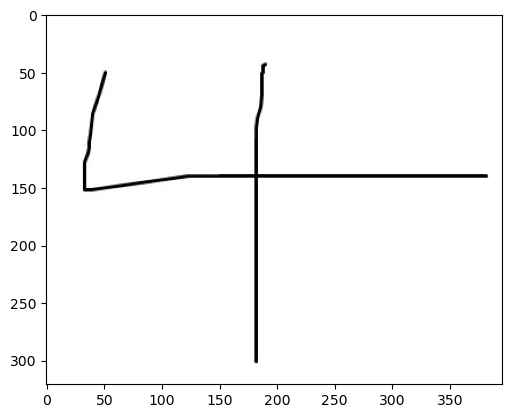

In [31]:
test = cv2.imread("C:/CNN_TEST3/number_4.JPG", cv2.IMREAD_GRAYSCALE)
plt.imshow(test, cmap='gray')  # 흑백 이미지를 표시하려면 cmap='gray'를 추가

In [32]:
test

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [33]:
test_BW=255-test

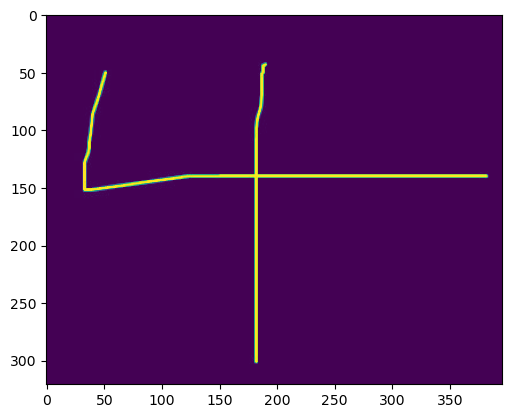

In [34]:
plt.imshow(test_BW)

In [35]:
test_BW.shape

(321, 396)

In [36]:
test_BW_size=cv2.resize(test_BW,(28,28))
test_BW_size.shape

(28, 28)

In [37]:
test_BW_size_re=test_BW_size.reshape(1,28,28)
test_BW_size_re.shape

(1, 28, 28)

In [38]:
Cnn.predict(test_BW_size_re)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[1.7315675e-07, 2.1157134e-03, 1.3225813e-05, 4.4474764e-05,
        2.5369893e-03, 1.5102481e-07, 1.3170393e-09, 9.9528873e-01,
        3.3735422e-08, 4.8968826e-07]], dtype=float32)

In [39]:
np.argmax(Cnn.predict(test_BW_size_re))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


7